
# **Introducción: Filtro RC pasa-bajos y filtro RL pasa-altos**

En este cuaderno estudiaremos dos filtros lineales de **primer orden**:

- **Pasa-bajos (LPF) RC en serie**: atenúa altas frecuencias y deja pasar bajas.  
  Configuración: `Vs — R — C` en serie, **salida en el capacitor**.  
  $$H_{LP}(j\omega)=\frac{V_o}{V_s}=\frac{1}{1+j\omega RC}$$
  Frecuencia de corte:
  $$\omega_{c,RC}=\frac{1}{RC},\qquad f_{c,RC}=\frac{1}{2\pi RC}.$$

- **Pasa-altos (HPF) RL en serie**: atenúa bajas frecuencias y deja pasar altas.  
  Configuración: `Vs — R — L` en serie, **salida en la resistencia**.  
  $$H_{HP}(j\omega)=\frac{V_o}{V_s}=\frac{j\omega L}{R + j\omega L}$$
  Frecuencia de corte:
  $$\omega_{c,RL}=\frac{R}{L},\qquad f_{c,RL}=\frac{R}{2\pi L}.$$

En la frecuencia de corte, la magnitud de ambas funciones de transferencia vale $1/\sqrt{2}$ ≈ −3 dB).  
Las fases típicas en $\omega_c$ son:
- Pasa-bajos RC: $\angle H_{LP}(\omega_c)=-45^\circ$.
- Pasa-altos RL: $\angle H_{HP}(\omega_c)=+45^\circ$.

## Qué haremos
- Derivar $H(j\omega)$ para ambas configuraciones mediante **divisor de voltaje**.
- Graficar los **diagramas de Bode** (magnitud y fase).
- Analizar el rol de \(R\), \(C\) y \(L\) en la **frecuencia de corte** y el comportamiento del filtro.
- Comentar aplicaciones típicas (suavizado de señales, desacople/retención de DC, pre-énfasis/atenuación de bajas, etc.).


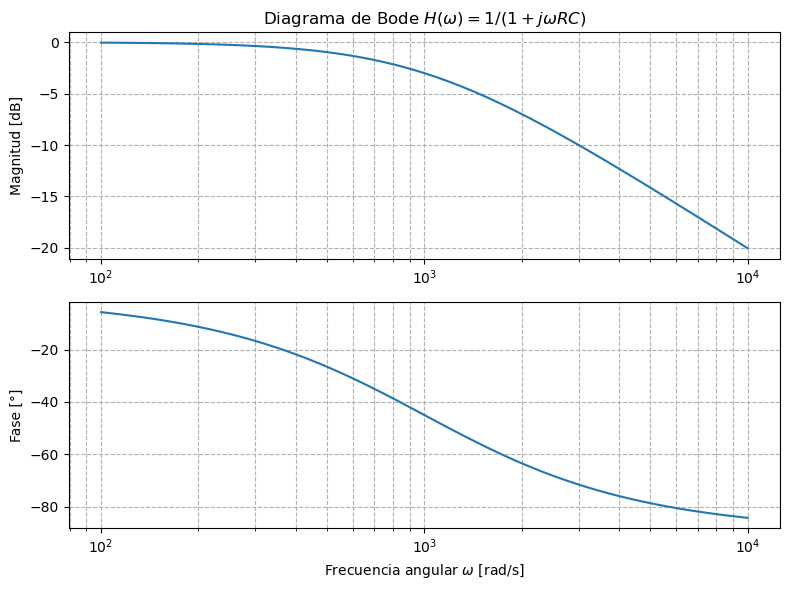

In [1]:
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros
R = 1e3       # 1 kΩ
C = 1e-6      # 1 µF

# \omega_c = 1/RC = 1000 rad/s (159.2 Hz)

# Numerador y denominador de H(s) = 1 / (1 + sRC)
num = [1]
den = [R*C, 1]

# Crear sistema
system = signal.TransferFunction(num, den)

# Obtener diagrama de Bode
w, mag, phase = signal.bode(system)

# Graficar
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.semilogx(w, mag)
plt.title(r'Diagrama de Bode $H(\omega)=1 /(1+j\omega RC)$')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', ls='--')

plt.subplot(2,1,2)
plt.semilogx(w, phase)
plt.ylabel('Fase [°]')
plt.xlabel(r'Frecuencia angular $\omega$ [rad/s]')
plt.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()

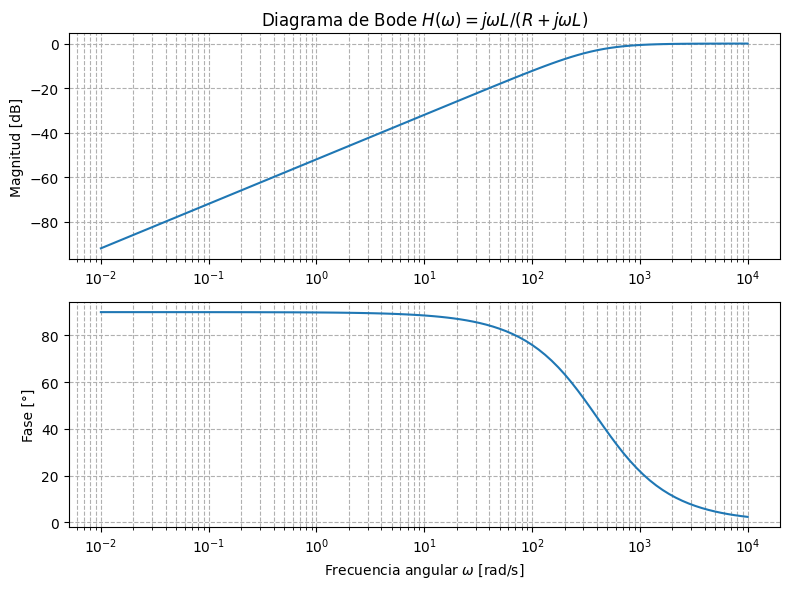

In [2]:
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros
R = 100       # 100 Ω
L = 250e-3      # 250 mH

# \omega_c = R/L = 400 rad/s (63.7 Hz)

# Numerador y denominador de H(s) = sL / (R + sL)
num = [L, 0]
den = [L, R]

# Crear sistema
system = signal.TransferFunction(num, den)

# Obtener diagrama de Bode
w, mag, phase = signal.bode(system)

# Graficar
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.semilogx(w, mag)
plt.title(r'Diagrama de Bode $H(\omega)=j\omega L /(R+j\omega L)$')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', ls='--')

plt.subplot(2,1,2)
plt.semilogx(w, phase)
plt.ylabel('Fase [°]')
plt.xlabel(r'Frecuencia angular $\omega$ [rad/s]')
plt.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()
